##loading the dataset

In [2]:
import pandas as pd
df = pd.read_csv('Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


##EDA

In [4]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


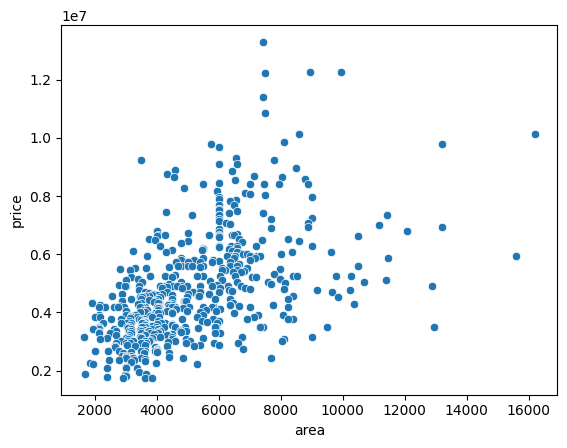

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data = df,x= "area",y = "price")
plt.show()

##data preprocessing

In [9]:
from sklearn.model_selection import train_test_split
df = df.dropna() #remove the missing value
X = df[['area']] #independent
y = df[['price']] #dependent
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

##model training

In [11]:
from sklearn.linear_model import LinearRegression
##initialize and tain the model
model = LinearRegression()
model.fit(X_train,y_train)

print(f'intercept(b0):{model.intercept_}')
print(f'intercept(b1):{model.coef_[0]}')

intercept(b0):[2512254.26395934]
intercept(b1):[425.72984194]


##Model Evaluation

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

#make the predictions
y_pred = model.predict(X_test)

##calculate evaluation metrics
r2 = r2_score(y_test,y_pred)
print("R2 score:",r2)

mse = mean_squared_error(y_test,y_pred)
print("mean of squared error:",mse)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

R2 score: 0.27287851871974644
mean of squared error: 3675286604768.185
Mean Absolute Error (MAE): 1474748.1337969352


##visualization

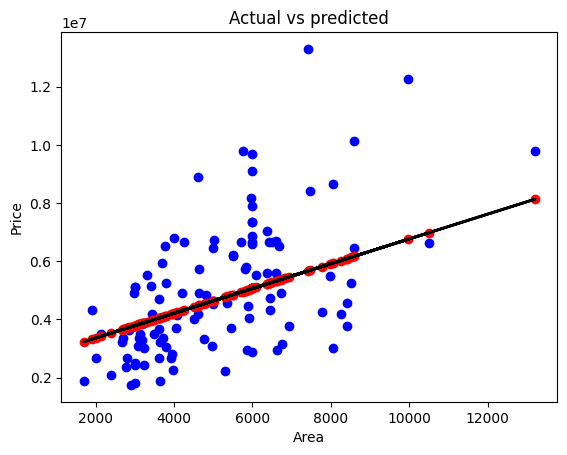

In [21]:
plt.scatter(X_test,y_test,color='blue',label="Actual")
plt.scatter(X_test,y_pred,color='red',label='predicted')
plt.plot(X_test,y_pred,color='black',linewidth=2,label="Regression Line")
plt.title("Actual vs predicted")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()